# Machine Learning - Andrew Ng ( Python Implementation)

##  Logistic Regression

### Loading of Data

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
df=pd.read_csv("ex2data1.txt",header=None)


In [4]:
df.head(5)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [139]:
# The line of code you're looking at is using the iLoc indexer from pandas to select slices of data from a dataframe DF
X=df.iloc[:,0:-1].values # X is a matrix (100,2) 
y=df.iloc[:,-1].values # y is a vector (100,1) 

In [6]:
X.shape

(100, 2)

In [7]:
print("X")
print(X[:5])
print("y")
print(y[:5])

X
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
y
[0 0 0 1 1]


In [8]:
print(len(y))

100


In [9]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Plotting of Data

In [38]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)


In [11]:
pos[:,0].size

100

In [12]:

X[pos[:,0],0].size

60

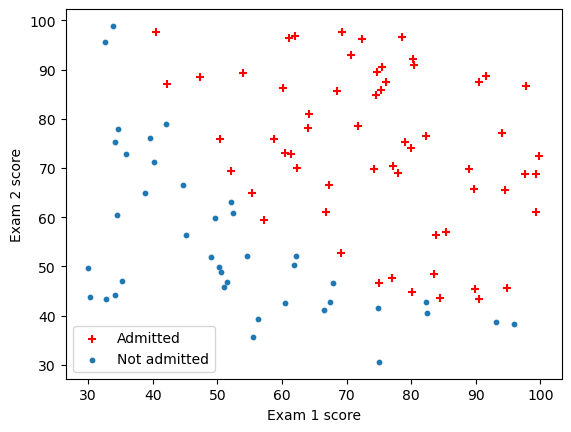

In [39]:
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [40]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [41]:
# testing the sigmoid function
sigmoid(37)

1.0

### Compute the Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [42]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Feature scaling

In [43]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [44]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)
print("init theta ",initial_theta)

Cost of initial theta is 0.360024763293982
Gradient at initial theta (zeros): [[ 0.07224269]
 [-0.1145249 ]
 [-0.0870292 ]]
init theta  [[1.]
 [1.]
 [1.]]


### Gradient Descent

In [45]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [46]:
theta , J_history = gradientDescent(X,y,initial_theta,0.1,1000)

In [47]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.30316663]
 [3.1151994 ]
 [2.87705033]]
The cost of the optimized theta: 0.2094636633068068


### Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

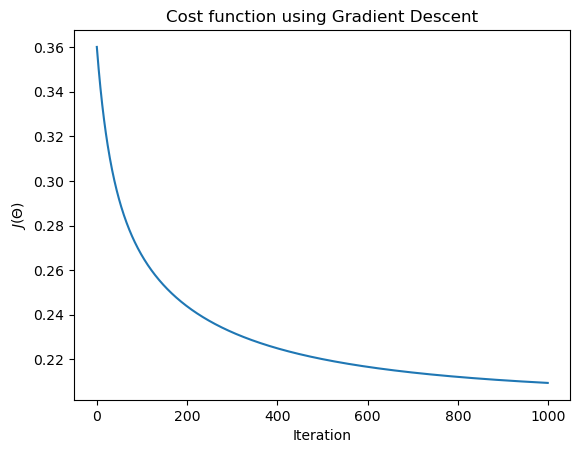

In [48]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

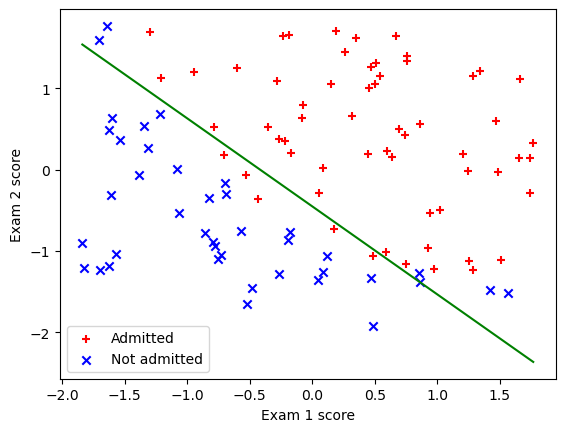

In [49]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

## Drawing some dicision boundry after adjusting theta
Decision boundry optimization starts with red ends with blue
<br>
In other words we are starting with an initial theta(red), then update the theta (greens) in each gredient step and
 finally we reach the best theta(blue)

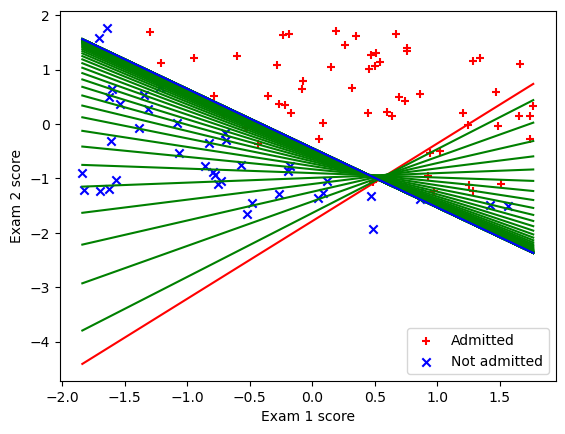

In [51]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])

global theta
theta=np.array([2.5,-2.0,1.4])
theta=theta.reshape(3,1)
#print(theta)
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "r")
    
number_iter=500
alpha=0.1
m=len(y)
J_history =[]

for i in range(number_iter):
    cost, grad = costFunction(theta,X,y)
     
    theta = theta - (alpha * grad)
    
    J_history.append(cost)
    y_value=-(theta[0] +theta[1]*x_value)/theta[2]
    if (i%10)==5 and i<500:
       plt.plot(x_value,y_value,c="g")
    elif i==number_iter-1:
       plt.plot(x_value,y_value,c="b")    

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Prediction

In [52]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [53]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.6693925490190484


### Accuracy on training set 

In [54]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %


## Scikit Learn

In [55]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [142]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression


#solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’).
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)
#so

LogisticRegression(random_state=42)

In [143]:
log_reg.predict([[60.7, 80.5]])


array([1], dtype=int64)

In [144]:
log_reg.predict([[30.7, 60.5]])

array([0], dtype=int64)

## Accuracy of training set

In [145]:
score = log_reg.score(X, y)
print(score)

0.89


In [146]:
from sklearn import metrics

In [147]:
predictions=log_reg.predict(X)
cm = metrics.confusion_matrix(y, predictions)


In [148]:
print(predictions)
print(y)
print(cm)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
[[34  6]
 [ 5 55]]


In [149]:
print(log_reg.coef_.shape)

(1, 2)


In [150]:
t0, t1, t2= log_reg.intercept_[0], log_reg.coef_[0][0],log_reg.coef_[0][1]
t0, t1, t2

(-25.052193143127436, 0.20535491218577973, 0.20058380395530137)

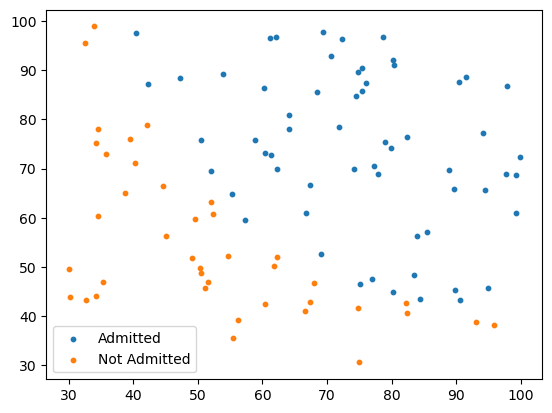

In [151]:
# filter out the applicants that got admitted
admitted = df.loc[y == 1]
# filter out the applicants that din't get admission
not_admitted = df.loc[y == 0]
# plots

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

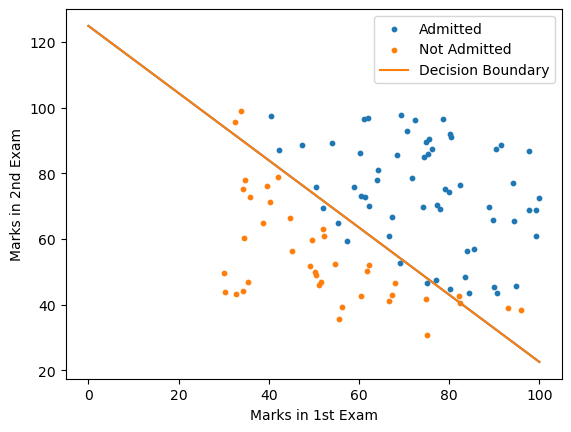

In [152]:
# filter out the applicants that got admitted
admitted = df.loc[y == 1]
# filter out the applicants that din't get admission
not_admitted = df.loc[y == 0]
# plots

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

x_values = np.linspace(0, 100, 100) 
y_values = - (t0 + np.dot(t1, x_values)) /t2

# Create a plot of the polynomial function
plt.plot(x_values, y_values)

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()


(100, 100) (100, 100)


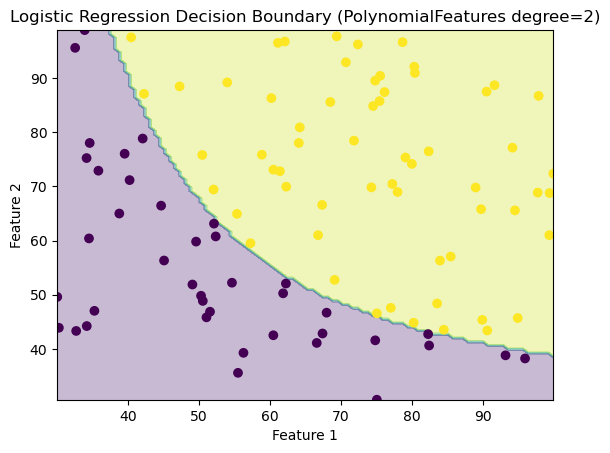

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Step 1: Generate Data
#X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

# Step 2: Preprocess Data (Scaling, if needed)
# ...

# Step 3: Train the Model with Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

clf = LogisticRegression()
clf.fit(X_poly, y)

# Step 4: Create a Meshgrid
x1, x2 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Step 5: Predict on Meshgrid
Z = clf.predict(poly.transform(np.c_[x1.ravel(), x2.ravel()])).reshape(x1.shape)

# Step 6: Plot Data and Decision Boundary
plt.contourf(x1, x2, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (PolynomialFeatures degree=2)')
plt.show()
